In [73]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [75]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/titanic_toy.csv")
df
#Fare give amount paid for ticket

Age     Fare  Family  Survived
0    22.0   7.2500       1         0
1    38.0  71.2833       1         1
2    26.0   7.9250       0         1
3    35.0  53.1000       1         1
4    35.0   8.0500       0         0
..    ...      ...     ...       ...
886  27.0  13.0000       0         0
887  19.0  30.0000       0         1
888   NaN  23.4500       3         0
889  26.0      NaN       0         1
890  32.0   7.7500       0         0

[891 rows x 4 columns]

In [76]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [77]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [79]:

X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [80]:
X_train


Age      Fare  Family  Age_99  Age_minus1  Fare_999  Fare_minus1
30   40.0   27.7208       0    40.0        40.0   27.7208      27.7208
10    4.0   16.7000       2     4.0         4.0   16.7000      16.7000
873  47.0    9.0000       0    47.0        47.0    9.0000       9.0000
182   9.0   31.3875       6     9.0         9.0   31.3875      31.3875
876  20.0    9.8458       0    20.0        20.0    9.8458       9.8458
..    ...       ...     ...     ...         ...       ...          ...
534  30.0    8.6625       0    30.0        30.0    8.6625       8.6625
584   NaN    8.7125       0    99.0        -1.0    8.7125       8.7125
493  71.0   49.5042       0    71.0        71.0   49.5042      49.5042
527   NaN  221.7792       0    99.0        -1.0  221.7792     221.7792
168   NaN   25.9250       0    99.0        -1.0   25.9250      25.9250

[712 rows x 7 columns]

In [81]:
X_test
#Columns added only for train

Age     Fare  Family
707  42.0  26.2875       0
37   21.0   8.0500       0
615  24.0  65.0000       3
169  28.0  56.4958       0
68   17.0   7.9250       6
..    ...      ...     ...
89   24.0   8.0500       0
80   22.0   9.0000       0
846   NaN  69.5500      10
870  26.0   7.8958       0
251  29.0      NaN       2

[179 rows x 3 columns]

In [82]:
print("Original Age variable variance:",X_train['Age'].var())
print("Age Variance after 99 wala imputation: ",X_train['Age_99'].var())
print("Age Variance after -1 wala imputation: ",X_train['Age_minus1'].var())

print("\n\n")
print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance: 204.3495133904614
Age Variance after 99 wala imputation:  951.7275570187172
Age Variance after -1 wala imputation:  318.0896202624484



Original Fare variable variance:  2448.197913706318
Fare Variance after 999 wala imputation:  47219.20265217623
Fare Variance after -1 wala imputation:  2378.5676784883503


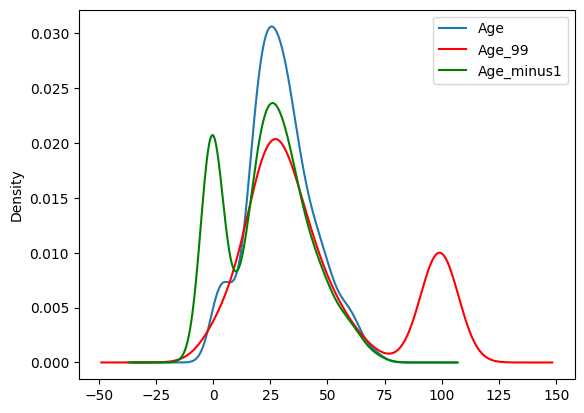

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

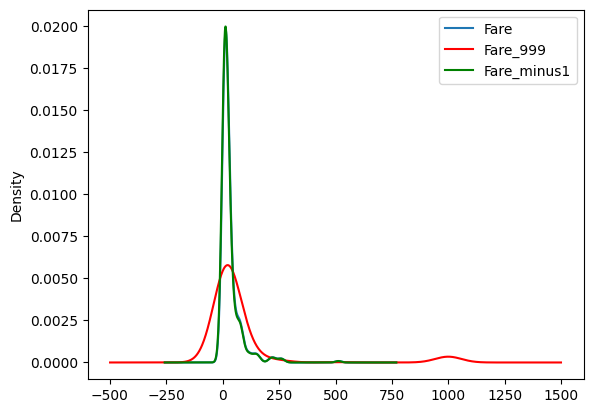

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [85]:
X_train.cov()

Age         Fare     Family      Age_99  Age_minus1  \
Age          204.349513    70.719262  -6.498901  204.349513  204.349513   
Fare          70.719262  2448.197914  17.258917 -101.671097  125.558364   
Family        -6.498901    17.258917   2.735252   -7.387287   -4.149246   
Age_99       204.349513  -101.671097  -7.387287  951.727557 -189.535540   
Age_minus1   204.349513   125.558364  -4.149246 -189.535540  318.089620   
Fare_999     162.793430  2448.197914  11.528625 -159.931663  257.379887   
Fare_minus1   63.321188  2448.197914  16.553989  -94.317400  114.394141   

                 Fare_999  Fare_minus1  
Age            162.793430    63.321188  
Fare          2448.197914  2448.197914  
Family          11.528625    16.553989  
Age_99        -159.931663   -94.317400  
Age_minus1     257.379887   114.394141  
Fare_999     47219.202652   762.474982  
Fare_minus1    762.474982  2378.567678

In [86]:
X_train.corr()

Age      Fare    Family    Age_99  Age_minus1  Fare_999  \
Age          1.000000  0.092644 -0.299113  1.000000    1.000000  0.051179   
Fare         0.092644  1.000000  0.208268 -0.066273    0.142022  1.000000   
Family      -0.299113  0.208268  1.000000 -0.144787   -0.140668  0.032079   
Age_99       1.000000 -0.066273 -0.144787  1.000000   -0.344476 -0.023857   
Age_minus1   1.000000  0.142022 -0.140668 -0.344476    1.000000  0.066411   
Fare_999     0.051179  1.000000  0.032079 -0.023857    0.066411  1.000000   
Fare_minus1  0.084585  1.000000  0.205233 -0.062687    0.131514  0.071946   

             Fare_minus1  
Age             0.084585  
Fare            1.000000  
Family          0.205233  
Age_99         -0.062687  
Age_minus1      0.131514  
Fare_999        0.071946  
Fare_minus1     1.000000

## Using SKlearn

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [88]:
imputer1=SimpleImputer(strategy='constant',fill_value=99)
imputer2=SimpleImputer(strategy='constant',fill_value=999)

In [89]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [90]:
trf.fit(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [91]:
#trf.named_transformers_['imputer1'].statistics_

In [92]:
#trf.named_transformers_['imputer2'].statistics_

In [93]:
#Debugging print statements
print("Type of X_train before transform:", type(X_train))
print("Type of X_test before transform:", type(X_test))
print("Feature names:", trf.get_feature_names_out())
print("Type of feature names:", type(trf.get_feature_names_out()))
print("Shape of transformed data:", trf.transform(X_train).shape)
print("Number of column names:", len(trf.get_feature_names_out()))
print("X_train columns:", X_train.columns)

Type of X_train before transform: <class 'pandas.core.frame.DataFrame'>
Type of X_test before transform: <class 'pandas.core.frame.DataFrame'>
Feature names: ['imputer1__Age' 'imputer2__Fare' 'remainder__Family']
Type of feature names: <class 'numpy.ndarray'>
Shape of transformed data: (712, 3)
Number of column names: 3
X_train columns: Index(['Age', 'Fare', 'Family'], dtype='object')


In [94]:
X_train

Age      Fare  Family
30   40.0   27.7208       0
10    4.0   16.7000       2
873  47.0    9.0000       0
182   9.0   31.3875       6
876  20.0    9.8458       0
..    ...       ...     ...
534  30.0    8.6625       0
584   NaN    8.7125       0
493  71.0   49.5042       0
527   NaN  221.7792       0
168   NaN   25.9250       0

[712 rows x 3 columns]

In [95]:
X_train.dtypes

Age       float64
Fare      float64
Family      int64
dtype: object

In [96]:
X_train_transformed = trf.transform(X_train)
X_test_transformed = trf.transform(X_test)

X_train = pd.DataFrame(X_train_transformed, columns=trf.get_feature_names_out())
X_test = pd.DataFrame(X_test_transformed, columns=trf.get_feature_names_out())


In [97]:
X_train

imputer1__Age  imputer2__Fare  remainder__Family
0             40.0         27.7208                0.0
1              4.0         16.7000                2.0
2             47.0          9.0000                0.0
3              9.0         31.3875                6.0
4             20.0          9.8458                0.0
..             ...             ...                ...
707           30.0          8.6625                0.0
708           99.0          8.7125                0.0
709           71.0         49.5042                0.0
710           99.0        221.7792                0.0
711           99.0         25.9250                0.0

[712 rows x 3 columns]